In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.spectrum_event import SuperKSpectrum

plt.rcParams['text.usetex']=True
plt.style.use('classic')

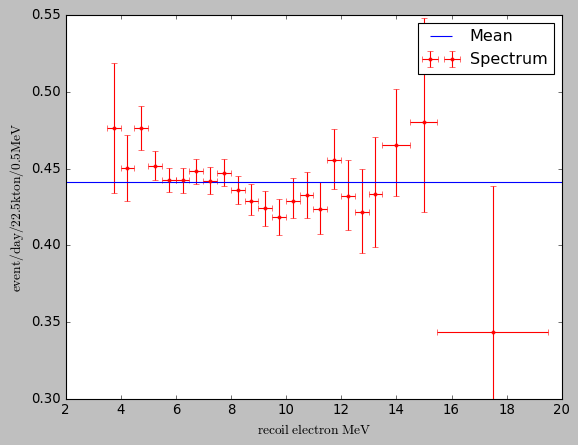

In [2]:
"""data illustration : B8 and hep
"""

Spectrum   = SuperKSpectrum(first_day='2015,1,1', last_day='2016,1,1')
spectrum_data = Spectrum.spectrum_data
energy_obs    = Spectrum.energy_obs

plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), spectrum_data[:,2] / (spectrum_data[:,11] + spectrum_data[:,12]),
             yerr = np.array([spectrum_data[:,4], spectrum_data[:,3]]) / (spectrum_data[:,11] + spectrum_data[:,12]), 
             xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='r.')

plt.hlines(xmin=2,xmax=20,y=0.441)

plt.legend(['Mean','Spectrum'])

<ErrorbarContainer object of 3 artists>

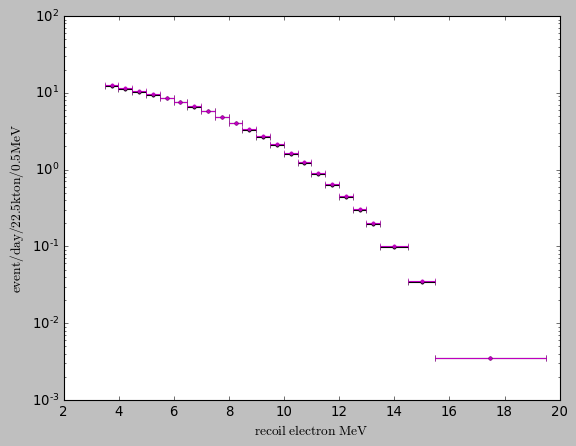

In [3]:
"""
Comparsion between our predection and the paper Phys. Rev. D 109, 092001 (2024).
expected B8 spectrum assuming no oscilation.
"""

b_un_per_day  = Spectrum.unoscillated_events_per_day

plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), (0.5 / (energy_obs[:,1] - energy_obs[:,0])) * spectrum_data[:,11] * 22.5 / 365.25,
             yerr=None, xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='k.' )
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), (0.5 / (energy_obs[:,1] - energy_obs[:,0])) * b_un_per_day ,
             yerr=None, xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='m.')

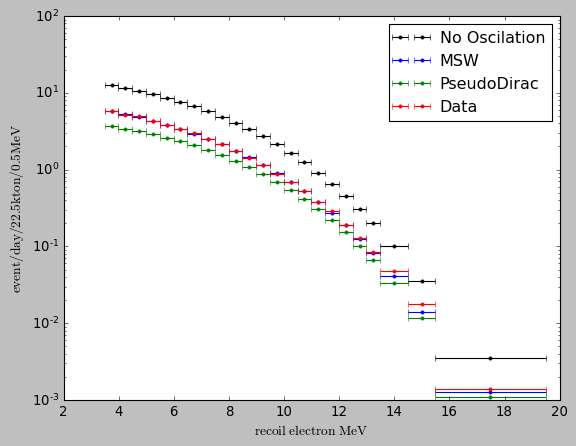

In [4]:
"""
B8 spectrum predection
"""
param = {'SinT12': 0.308, 'M12': 7.5e-5}
spectrum_event_per_day = Spectrum.__getitem__(param, name="MSW")
spectrum_event_per_day2 = Spectrum.__getitem__(param, name="PseudoDirac")

plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * b_un_per_day,
             yerr=None,  xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='k.')
plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * spectrum_event_per_day,
             yerr=None, xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='b.')
plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * spectrum_event_per_day2,
             yerr=None, xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='g.')
plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * spectrum_data[:,2] * 22.5 / 365.25 ,
             yerr=None,  xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='r.')

plt.legend(['No Oscilation', 'MSW', 'PseudoDirac', 'Data'])

day
0.43431035208888763
night
0.45136589196236204
all
0.4430360899043997
MSW prediction
0.4321274112873458


<ErrorbarContainer object of 3 artists>

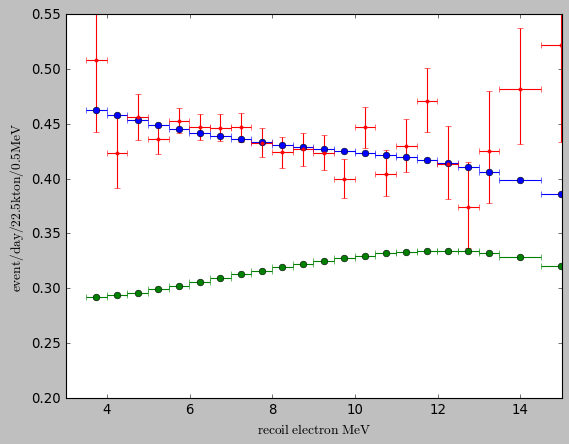

In [5]:
"""Observed only B8_per_day spectrum data and MSW prediction"""
bin_number = 20

print('day')
print(np.mean(spectrum_data[:bin_number,5]/(spectrum_data[:bin_number,11])))

print('night')
print(np.mean(spectrum_data[:bin_number,8]/(spectrum_data[:bin_number,11])))

print('all')
print(np.mean(spectrum_data[:bin_number,2]/(spectrum_data[:bin_number,11])))


print('MSW prediction')
print(np.mean((spectrum_event_per_day/b_un_per_day)[:bin_number]))

plt.xlim(3,15)
plt.ylim(0.2,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), spectrum_event_per_day2 / b_un_per_day,
             yerr=None, xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='go')
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), spectrum_event_per_day / b_un_per_day,
             yerr=None, xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='bo')
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), spectrum_data[:,5] / (spectrum_data[:,11]),
             yerr= np.array([spectrum_data[:,7],spectrum_data[:,6]])/(spectrum_data[:,11]),
             xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='r.')
